# LINEAR REGRESSION PRACTICE: Tips Dataset from Seaborn

In this notebook, Ttipps dataset from the seaborn library will be analysed in terms of simple and multiple linear regression algortihms.

First, a simple linear reg analysis will be performed to see the relatioship between total bill (independent variable, feature, X, input, explanatory variable) and tip amount (dependent variable, label, target, y, output, response variable).

And then a multiple linear regression will be performed between the independent variables of total bill and size and dependent variable tip.

Linear regression functions from the sklearn library.

Evaluation metrics such as R2, Mean absolute error, mean squared error and root mean squared error will be performed to evaluate the errors (residulas) and difference between the real values and predicted values through the model.



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
# filter the data to the numerical features
df = df.select_dtypes(include = "number")
df 

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [19]:
# take the dep variable (label-target-y) tip to the end
df = df.iloc[:, [0,2,1]]
df 

,total_bill,size,tip
0,16.99,2,1.01
1,10.34,3,1.66
2,21.01,3,3.50
3,23.68,2,3.31
4,24.59,4,3.61
...,...,...,...
239,29.03,3,5.92
240,27.18,2,2.00
241,22.67,2,2.00
242,17.82,2,1.75


**Distribution of features**

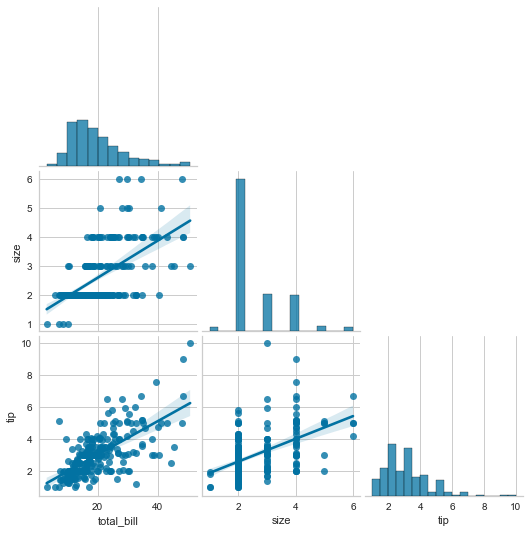

In [20]:
sns.pairplot(df, kind = "reg", corner=True)

In [21]:
# In fact, size is a categorical variable. However, I'll continue with it to perform a multilinear regression algorith after a simple reg an.

**# general insights and main statistics from the data**

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   size        244 non-null    int64  
 2   tip         244 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.8 KB


In [23]:
df = df.astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   size        244 non-null    float64
 2   tip         244 non-null    float64
dtypes: float64(3)
memory usage: 5.8 KB


In [24]:
df.shape

(244, 3)

In [25]:
df.describe()

,total_bill,size,tip
count,244.000000,244.000000,244.000000
mean,19.785943,2.569672,2.998279
std,8.902412,0.951100,1.383638
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.000000,2.900000
75%,24.127500,3.000000,3.562500
max,50.810000,6.000000,10.000000


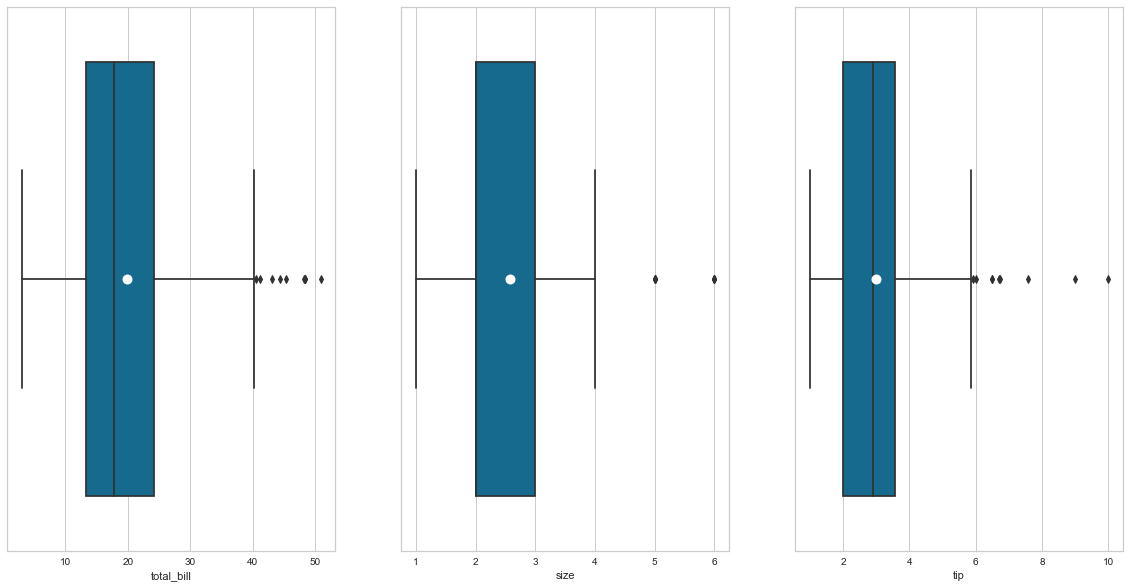

In [26]:
# boxplots and outlier check

index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(1, 3, index)
    sns.boxplot(x=feature, 
                data=df, 
                whis=1.5,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})

In [27]:
df.total_bill.sort_values().tail(10)

95     40.17
184    40.55
142    41.19
197    43.11
102    44.30
182    45.35
156    48.17
59     48.27
212    48.33
170    50.81
Name: total_bill, dtype: float64

In [28]:
df.sort_values("total_bill").tail(10)
# compared to the overall patterns in the data, the last 2 observations appear as outlier. 

,total_bill,size,tip
95,40.17,4.0,4.73
184,40.55,2.0,3.00
142,41.19,5.0,5.00
197,43.11,4.0,5.00
102,44.30,3.0,2.50
182,45.35,3.0,3.50
156,48.17,6.0,5.00
59,48.27,4.0,6.73
212,48.33,4.0,9.00
170,50.81,3.0,10.00


In [29]:
df.drop([212,170], inplace=True)

In [30]:
df.sort_values("total_bill").tail(5)

,total_bill,size,tip
197,43.11,4.0,5.00
102,44.30,3.0,2.50
182,45.35,3.0,3.50
156,48.17,6.0,5.00
59,48.27,4.0,6.73


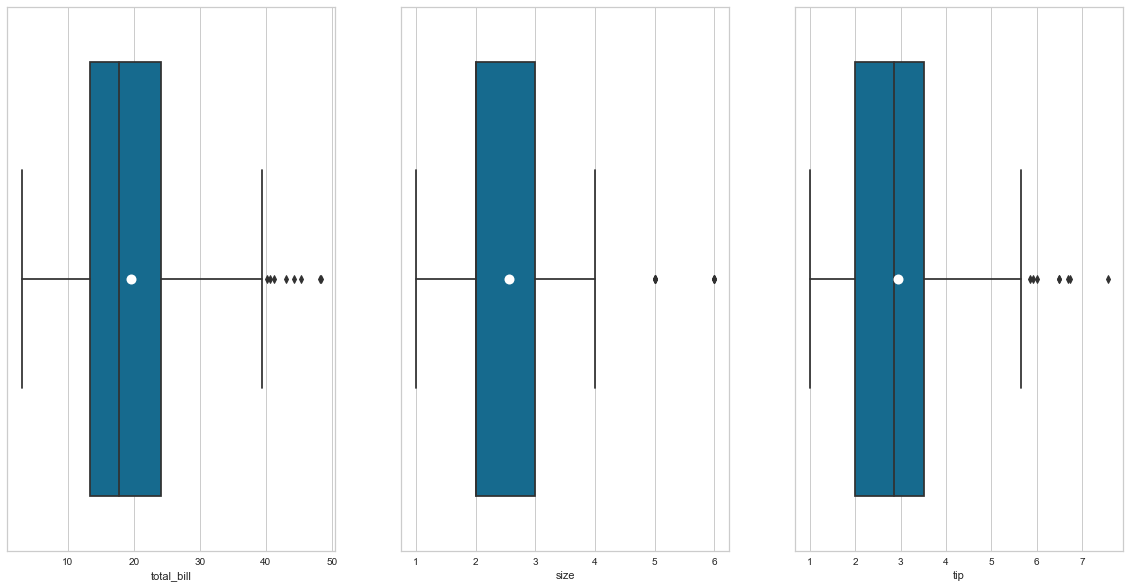

In [31]:
# boxplots and outlier check after handling outliers

index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(1, 3, index)
    sns.boxplot(x=feature, 
                data=df, 
                whis=1.5,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})

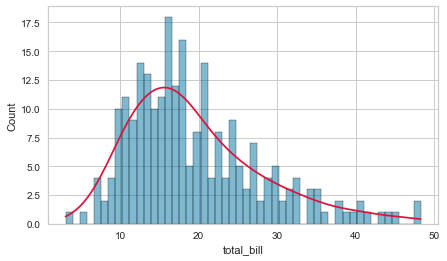

In [32]:
# check with histplot
ax = sns.histplot(df.total_bill, bins=50, kde=True)
ax.lines[0].set_color('crimson')
# right skewed

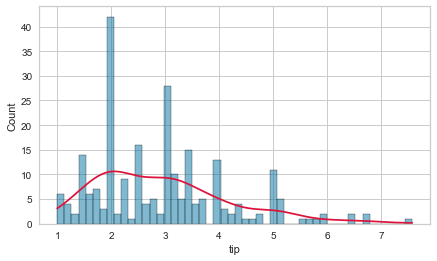

In [33]:
ax = sns.histplot(df.tip, bins=50, kde=True)
ax.lines[0].set_color('crimson')
# right skewed, but outliers above upper limit are valid data points

**Correlation between the features and heatmap**

In [34]:
df.corr()

,total_bill,size,tip
total_bill,1.000000,0.603464,0.633474
size,0.603464,1.000000,0.503844
tip,0.633474,0.503844,1.000000


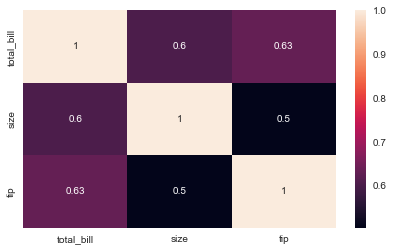

In [35]:
sns.heatmap(data = df.corr(), annot= True);
# it can be seen that there is positive relationship between the total_bill, size and tip amount.
# However, the relationship is no so strong and it's expecially lower between size and tip amount


In [36]:
for i in df.drop(columns ="tip"):
    print(f"Corr between tip and {i:<12}:  {df.tip.corr(df[i])}")

Corr between tip and total_bill  :  0.6334742425303583
Corr between tip and size        :  0.5038440380890562


**Simple Linear Regression**

In [37]:
# total bill and tip features will be taken for a simple lin reg analysis.
# total bill is the X - independent var and tip amount is the output-target-label-dep var in this case

df2 = df[["total_bill", "tip"]]
df2

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [38]:
corr = df2.total_bill.corr(df.tip)
corr

0.6334742425303584

**Plotting the relationship between independent variable and dependent variable**

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

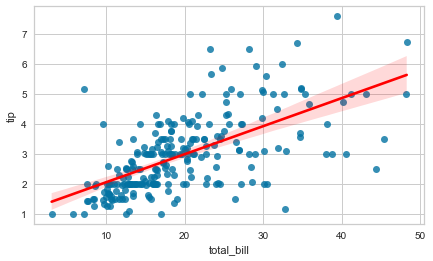

In [39]:
sns.regplot(x = df.total_bill, y = df.tip, line_kws={"color": "red"})

In [40]:
df2.total_bill.sort_values().head(10)

67     3.07
92     5.75
111    7.25
172    7.25
149    7.51
195    7.56
218    7.74
145    8.35
135    8.51
126    8.52
Name: total_bill, dtype: float64

In [41]:
df2.sample(10)

,total_bill,tip
143,27.05,5.00
92,5.75,1.00
42,13.94,3.06
12,15.42,1.57
214,28.17,6.50
84,15.98,2.03
228,13.28,2.72
142,41.19,5.00
72,26.86,3.14
138,16.00,2.00


## Coefficient of determination (R2)

The coefficient of determination (R²) is a number between 0 and 1 that measures how well a statistical model predicts an outcome. You can interpret the R² as the proportion of variation in the dependent variable that is predicted by the statistical model. The coefficient of determination is used to explain the relationship between an independent and dependent variable. The coefficient of determination is commonly called r-squared (or r2) for the statistical value it represents.

In [42]:
R2 = corr**2
R2

0.40128961594941137

As it can be seen from the R2 score, total bill as an independent variable can explain the change in the tip label as a dependent variable in a poor way, juts 40%. This means that the other factors such as the day of weekend, time of the day, number of the people should also be taken into account. But just for practicing I'll keep simple lin reg analysis.

In [43]:
X = df.total_bill
y = df.tip

np.polyfit(X, y, deg=1)

array([0.09337134, 1.12008875])

In [44]:
slope, intercept = np.polyfit(X, y, deg=1)

print("slope    :", slope)
print("intercept:", intercept)

slope    : 0.09337134078484516
intercept: 1.1200887472089167


In [45]:
b1, b0 = np.polyfit(X, y, deg=1)

# b1 = slope, b0= intercept

In [46]:
y_pred = b1*X + b0

In [47]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2, "ABS":abs(y-y_pred)}
df3 = pd.DataFrame(values)
df3

,actual,predicted,residual,LSE,ABS
0,1.01,2.706468,-1.696468,2.878003,1.696468
1,1.66,2.085548,-0.425548,0.181091,0.425548
2,3.50,3.081821,0.418179,0.174874,0.418179
3,3.31,3.331122,-0.021122,0.000446,0.021122
4,3.61,3.416090,0.193910,0.037601,0.193910
...,...,...,...,...,...
239,5.92,3.830659,2.089341,4.365347,2.089341
240,2.00,3.657922,-1.657922,2.748705,1.657922
241,2.00,3.236817,-1.236817,1.529716,1.236817
242,1.75,2.783966,-1.033966,1.069086,1.033966


In [48]:
np.mean(df3.LSE)

0.9388100443193914

In [49]:
np.mean(df3.ABS)

0.73135364959517

In [50]:
# as it can be seen, total bill on its own is a poor determinator of the tip amount. Let's deepen the detail by 
# using also size feature through a multiple linear regression

# Multiple Linear Regression and Regression Error Metrics

**Train-Test split**

In [51]:
X = df.drop(columns ="tip") #df[["total_bill", "size"]] - independent variables - input
y = df["tip"]  # dependent var - output- response var.

In [52]:
display(X,y)

,total_bill,size
0,16.99,2.0
1,10.34,3.0
2,21.01,3.0
3,23.68,2.0
4,24.59,4.0
...,...,...
239,29.03,3.0
240,27.18,2.0
241,22.67,2.0
242,17.82,2.0


0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 242, dtype: float64

In [53]:
# import the function to split the data
from sklearn.model_selection import train_test_split

In [54]:
# execute the function and split the data

# since our dataset consists of only 242 rows, I'll decrease the test size to 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)


In [55]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (193, 2)
Train target shape   :  (193,)
Test features shape  :  (49, 2)
Test target shape    :  (49,)


In [56]:
X_train

,total_bill,size
115,17.31,2.0
207,38.73,4.0
158,13.39,2.0
132,11.17,2.0
84,15.98,2.0
...,...,...
106,20.49,2.0
14,14.83,2.0
92,5.75,2.0
180,34.65,4.0


In [7]:
X_test

NameError: name 'X_test' is not defined

In [57]:
y_train

115    3.50
207    3.00
158    2.61
132    1.50
84     2.03
       ... 
106    4.06
14     3.02
92     1.00
180    3.68
102    2.50
Name: tip, Length: 193, dtype: float64

In [58]:
y_test

24     3.18
6      2.00
152    2.74
210    2.00
239    5.92
200    4.00
191    4.19
150    2.50
9      3.23
113    2.55
45     3.00
209    2.23
228    2.72
171    3.16
82     1.83
161    2.50
233    1.47
15     3.92
66     2.47
127    2.00
33     2.45
19     3.35
108    3.76
30     1.45
185    5.00
164    3.00
10     1.71
73     5.00
93     4.30
155    5.14
111    1.00
218    1.44
25     2.34
60     3.21
18     3.50
126    1.48
96     4.00
196    2.00
137    2.00
241    2.00
75     1.25
117    1.50
112    4.00
16     1.67
195    1.44
67     1.00
167    4.50
38     2.31
242    1.75
Name: tip, dtype: float64

**Model Fitting and Comparison of Actual and Predicted Labels**

In [59]:
from sklearn.linear_model import LinearRegression

# Import LinearRegression algorithm

In [60]:
# assign the algorith to a variable called model
model = LinearRegression()

In [61]:
# fit the model
model.fit(X_train, y_train) 

LinearRegression()

In [62]:
y_pred = model.predict(X_test)
y_pred

array([2.80266054, 2.01942824, 2.88827087, 3.79554448, 3.7225373 ,
       2.99104796, 2.80195173, 2.39509622, 2.44542155, 3.09539804,
       2.69421299, 2.30224244, 2.33910043, 2.51842873, 1.84450816,
       2.29515436, 2.16118974, 2.92741066, 2.56379241, 2.42699256,
       3.3984569 , 3.12855661, 2.69066895, 2.07471523, 3.66552195,
       2.638926  , 2.12574937, 3.18966943, 2.55457791, 4.31478963,
       1.64462444, 1.94642107, 3.19432034, 2.83597449, 2.86771545,
       2.00170805, 3.33143094, 2.13071102, 2.40076668, 3.00467068,
       2.14276075, 2.15268405, 4.36329929, 2.39706727, 1.93366253,
       1.34834291, 4.17956277, 2.98963034, 2.66089903])

In [63]:
model.coef_

# coefficients of total_bill and size


array([0.07088075, 0.26706506])

In [64]:
model.intercept_
# b0

0.8636739461747238

In [65]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [66]:
compairing = pd.DataFrame(my_dict)
compairing


,Actual,Pred,Residual,LSE,ABS
24,3.18,2.802661,0.377339,0.142385,0.377339
6,2.00,2.019428,-0.019428,0.000377,0.019428
152,2.74,2.888271,-0.148271,0.021984,0.148271
210,2.00,3.795544,-1.795544,3.223980,1.795544
239,5.92,3.722537,2.197463,4.828842,2.197463
200,4.00,2.991048,1.008952,1.017984,1.008952
191,4.19,2.801952,1.388048,1.926678,1.388048
150,2.50,2.395096,0.104904,0.011005,0.104904
9,3.23,2.445422,0.784578,0.615563,0.784578
113,2.55,3.095398,-0.545398,0.297459,0.545398


In [67]:
# create a dataframe from actual, predicton and errors (residuals)
result_sample = compairing.iloc[:, :3]
result_sample

,Actual,Pred,Residual
24,3.18,2.802661,0.377339
6,2.00,2.019428,-0.019428
152,2.74,2.888271,-0.148271
210,2.00,3.795544,-1.795544
239,5.92,3.722537,2.197463
200,4.00,2.991048,1.008952
191,4.19,2.801952,1.388048
150,2.50,2.395096,0.104904
9,3.23,2.445422,0.784578
113,2.55,3.095398,-0.545398


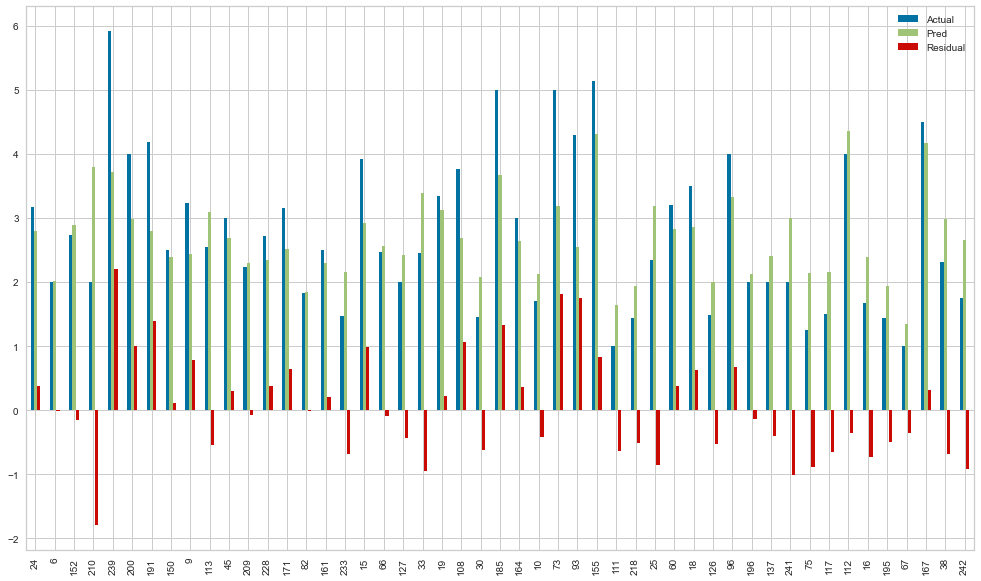

In [68]:
result_sample.plot(kind ="bar", figsize=(17,10))
plt.show();

**Evaluation metrics - Error metrics**

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
# model testing performance
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    #  rmse = mean_squared_error(actual, pred, squared=False)
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

In [71]:
eval_metric(y_test, y_pred)
# it can be clearly seen from the results that, we have and underfitting problem due to the use of very few features.


Model testing performance:
--------------------------
R2_score : 0.5151063785840937
MAE      : 0.6668865361003258
MSE      : 0.6836710054783789
RMSE     : 0.8268440031096428


In [72]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse / df.tip.mean()

# as it can be seen from the RMSE, the model has an average 28% error rate. Therefore, it should be fed with additional features.

0.2808053113370197

In [73]:
y_train_pred = model.predict(X_train)


In [74]:
# model training performance
def eval_metric_train(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    #  rmse = mean_squared_error(actual, pred, squared=False)
    R2_score = r2_score(actual, pred)
    print("Model training performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

In [75]:
eval_metric_train(y_train, y_train_pred)


Model training performance:
--------------------------
R2_score : 0.3989048901818595
MAE      : 0.7392611709904122
MSE      : 0.9600462655604254
RMSE     : 0.9798195066237584


# Is data suitable for linear regression?

**Plotting residuals**

In [76]:
residuals = y_test-y_pred

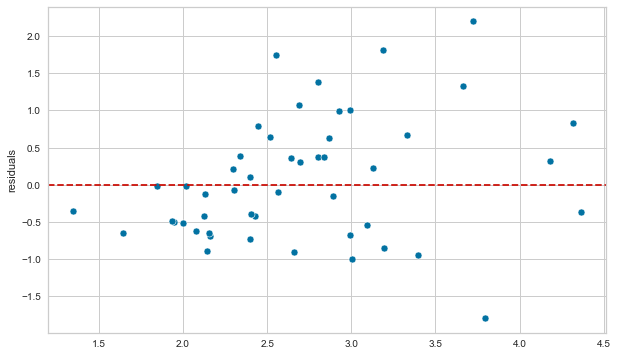

In [77]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

# residuals;
# 1. is the distribution random and homoskedasticity
# 2. does the distribution has a similar pattern to normal dist
#

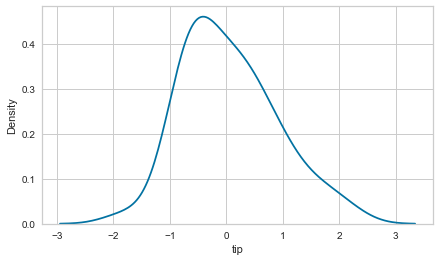

In [78]:
# check kde plot to see if the data is suitable for lin reg
sns.kdeplot(residuals)
plt.show();

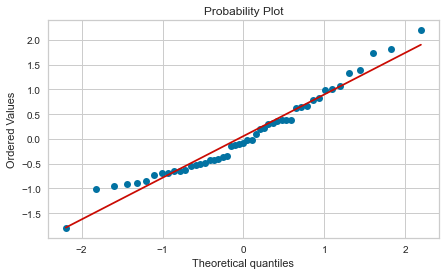

In [79]:
# check the probability plot
stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

In [80]:
# check the skewness
from scipy.stats import skew
skew(residuals)

# skew has a score between -0.5 to +0.5, this means that the data is very suitable for a normal dist


0.5124763776869403

In [ ]:
# !pip install yellowbrick

In [ ]:
# we can also check it with a residualplot from the yellowbrick library

from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

**Prediction Error for LinearRegression**

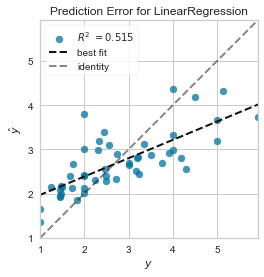

In [81]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

**Retraining Model on Full Data**

In [ ]:
final_model = LinearRegression()


In [ ]:
final_model.fit(X, y)


In [ ]:
# coefficients
final_model.coef_


In [ ]:
final_model.intercept
_

**Prediction on New Data**

In [ ]:
new_cust = [[30, 3], [35, 3], [40,3,], [40,4]]


In [ ]:
final_model.predict(new_cust)


In [ ]:
4.61759288-3.85394001
# total_bill coef


# Can we improve the scores with a Polynomial Regression Model?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [82]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [83]:
poly_features = polynomial_converter.transform(X)

In [92]:
X

,total_bill,size
0,16.99,2.0
1,10.34,3.0
2,21.01,3.0
3,23.68,2.0
4,24.59,4.0
...,...,...
239,29.03,3.0
240,27.18,2.0
241,22.67,2.0
242,17.82,2.0


In [84]:
poly_features

array([[ 16.99  ,   2.    , 288.6601,  33.98  ,   4.    ],
       [ 10.34  ,   3.    , 106.9156,  31.02  ,   9.    ],
       [ 21.01  ,   3.    , 441.4201,  63.03  ,   9.    ],
       ...,
       [ 22.67  ,   2.    , 513.9289,  45.34  ,   4.    ],
       [ 17.82  ,   2.    , 317.5524,  35.64  ,   4.    ],
       [ 18.78  ,   2.    , 352.6884,  37.56  ,   4.    ]])

In [85]:
poly_features.shape

(242, 5)

In [86]:
# train - test split
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 42)

In [88]:
# model for fitting
from sklearn.linear_model import LinearRegression

model_poly = LinearRegression()

model_poly.fit(X_train, y_train)


LinearRegression()

In [89]:
# for test predicts
y_pred = model_poly.predict(X_test)

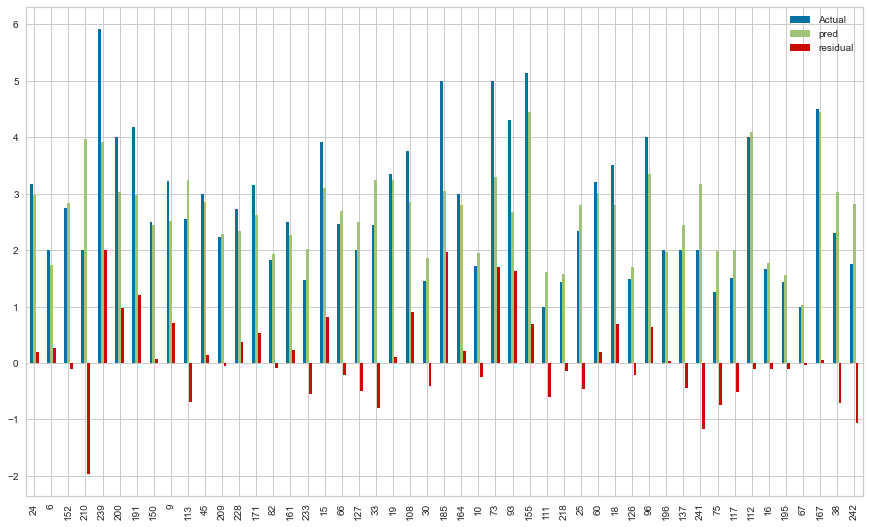

In [90]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.plot(kind='bar',figsize=(15,9))
plt.show();

In [93]:
# poly coefficents

df_coef = pd.DataFrame(model_poly.coef_, index = ["total_bill", "size", "total_bill_^2", "total_billXsize", "size^2"], columns = ["coef"])
df_coef

,coef
total_bill,0.132875
size,-0.069546
total_bill_^2,-0.003379
total_billXsize,0.038204
size^2,-0.103201


In [94]:
# Evaluation on the Test Set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model_poly.predict(X_test)

In [95]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")
    
eval_metric(y_test, y_pred)

# R2 score has increased from 51% to 56% but it's still too inadeqaute.

Model testing performance:
--------------------------
R2_score : 0.5600625357475495
MAE      : 0.5788590766838414
MSE      : 0.620285512634328
RMSE     : 0.7875820672376486


In [96]:
y_train_pred = model_poly.predict(X_train)

In [97]:
# model training performance
def eval_metric_train(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model training performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")
    
eval_metric_train(y_train, y_train_pred)

Model training performance:
--------------------------
R2_score : 0.43027872990400107
MAE      : 0.6994904128765359
MSE      : 0.9099371610783641
RMSE     : 0.9539062643039745


Comparison of MLR and PLR

Multiple linear regression metrics:

Model testing performance:
--------------------------
R2_score : 0.5151063785840937
MAE      : 0.6668865361003258
MSE      : 0.6836710054783789
RMSE     : 0.8268440031096428


Polynomial linear regression metrics:

Model testing performance:
--------------------------
R2_score : 0.5600625357475495
MAE      : 0.5788590766838414
MSE      : 0.620285512634328
RMSE     : 0.7875820672376486


In [98]:
# try to find the optimal poly degree

def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias = False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1, d))

In [99]:
poly(7)

,train_rmse_errors,test_rmse_errors,number of features
1,0.979820,0.826844,2
2,0.953906,0.787582,5
3,0.940633,0.778816,9
4,0.917395,0.899757,14
5,0.898221,1.451102,20
6,0.874109,128.438184,27


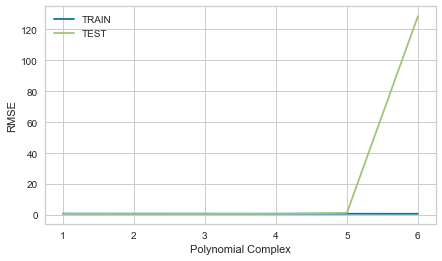

In [100]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynomial Complex")
plt.ylabel("RMSE")
plt.legend();

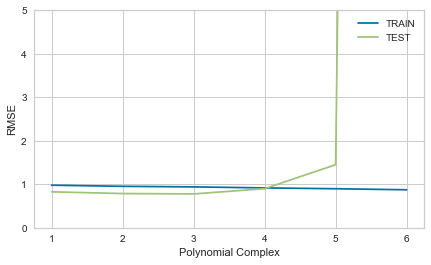

In [101]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynomial Complex")
plt.ylabel("RMSE")
plt.ylim(0,5)
plt.legend();